# compare saved models on test data

5.3.2021

todos: 
* Heatmaps should share the same colouring / colour range. To be better comparable at a glance.

dones:
* make a pd DataFrame for the accuracy and highest error rate over gender-ethnicity combinations for ethnicities 1 and 2.
* accuracy should be higher (even resnet gets only 95%), is there a calculation error somewhere?? checked that the total numbers retuned by ... were the same as the test set size (=100)
* there are different folders for the models to test: select by un/commenting

In [7]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from torchvision import models
import torch.nn as nn

from myModels import myModels as mm # mm = myModels
from torchvision import transforms

import test # test.py in this directory

In [15]:
images_test_dir = '../images_test/'
# to build PATH to save the best model

# choose model_dir, which models to test, un/comment
model_dir = 'myModels/best/'
#model_dir = 'myModels/best-at-least-30-epochs/'

# where to save plots from evaluation on the test set
test_plots_dir = 'test_plots/'
# path to test labels
test_labels_file = '../meta/labels2k_A_test.csv'
# eventually do evaluation for all models in model_dir
# for now load a single model and get it to do predictions
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print ("torch.cuda.is_available(): ", torch.cuda.is_available())

torch.cuda.is_available():  True


# load models

## load all models in a folder
Each model requires images in a different format, like 256x256 for my custom model 6 and 128x128 for my custom model 3, 224x224 for the resnet18 model. So they basically work on different dataset and dataloader classes implemented to serve images from the image folder to the neural network model.

To run testing for different models each models has to be matched to the correct dataloader. This should be a sklearn pipeline.

In [16]:
# transforms that match the resizing the model needs for its input data
def trans_form(h=224,w=224):
    '''hand over integers (or floats that will be cast to integer) and resize to this shape.
    call as trans_form(model.get_img_shape()).
    default is set to 224 for resnet where I dont have the get_img_size method 
    (I should be able to get the required imagesize from model.inputs or something?)'''
    return transforms.Compose([
    transforms.Resize((int(h),int(w))), # imgH, imgW as required for model
    transforms.ToTensor()
])

In [17]:
def get_data_loader(dataset_path , labels_path, model):
    # labels_path '../meta/labels2k_A_test.csv'
    # dataset_path = images_test_dir
    imgH = imgW = 224 # required for resnet
    try:
        imgH, imgW = model.get_img_shape() # updates for mm.MyNeuralNetworkX X in {3,6}
    except:
        pass
        
    transform = trans_form(imgH, imgW)

    df = pd.read_csv(labels_path, index_col=0) 
    df.index=range(df.shape[0])
    setup = df[['Gender','Age','Race','newFilename']].copy()

    testset = test.TestSet(images_dir=dataset_path , setup=setup, transform=transform)
    batch_size=5 # this should be automated # this can be set to any value! 1,5,10, 100 (=size of test set)
    loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    
    return loader

In [18]:
def matrix_division (error, tots):
    '''given 2 matrices of same shape, divide one by the other, element wise'''
    assert error.shape == tots.shape, 'matrices have to be of the same shape.'
    
    error_rel = np.zeros(error.shape)
    
    for e in range(error.shape[0]):
        for g in range(error.shape[1]):
            if tots[e,g]==0:
                error_rel[e,g]=None
            else:
                error_rel[e,g] = error[e,g] / tots[e,g]
    return error_rel

myModels/best/resnet18_pretrained_acc9800.pt myModels/best/resnet18
resnet18
will load state dict for  myModels/best/resnet18_pretrained_acc9800.pt
in TestSet.len returning : 100


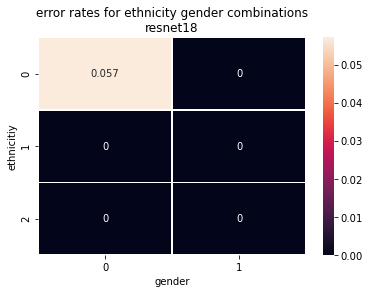

myModels/best/MyNeuralNetwork3_acc9200_epoch14.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch14.pt
in TestSet.len returning : 100


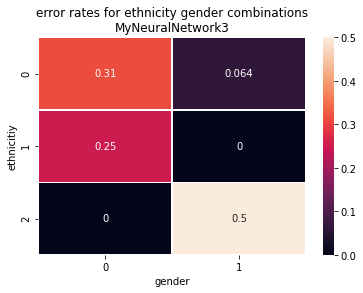

myModels/best/MyNeuralNetwork3_acc9300_epoch15.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9300_epoch15.pt
in TestSet.len returning : 100


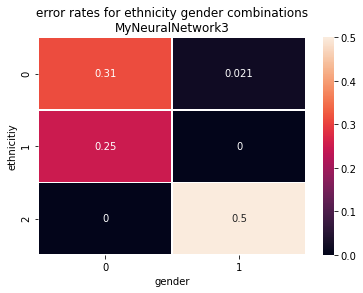

myModels/best/MyNeuralNetwork3_acc9200_epoch40.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch40.pt
in TestSet.len returning : 100


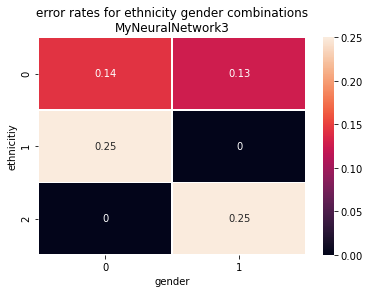

myModels/best/MyNeuralNetwork3_acc8800.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc8800.pt
in TestSet.len returning : 100


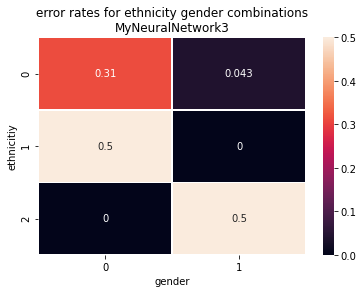

myModels/best/MyNeuralNetwork3_acc9300_epoch36.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9300_epoch36.pt
in TestSet.len returning : 100


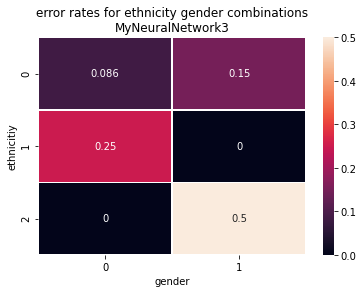

myModels/best/MyNeuralNetwork3_acc9200_epoch31.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch31.pt
in TestSet.len returning : 100


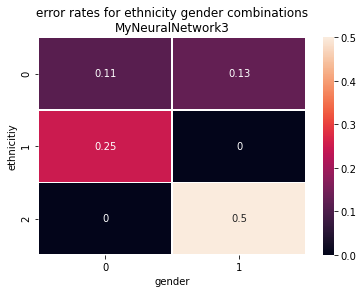

myModels/best/MyNeuralNetwork3_acc9200_epoch30.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch30.pt
in TestSet.len returning : 100


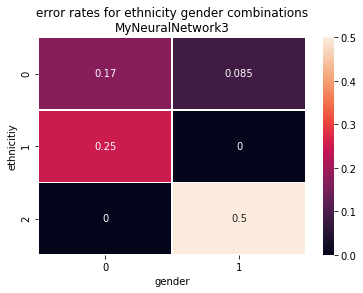

myModels/best/MyNeuralNetwork3_acc9100_epoch33.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9100_epoch33.pt
in TestSet.len returning : 100


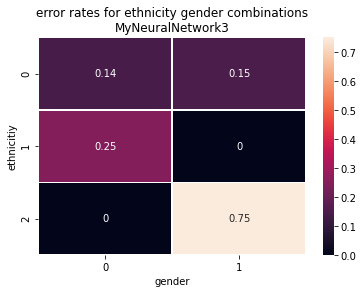

myModels/best/MyNeuralNetwork3_acc9200_epoch25.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch25.pt
in TestSet.len returning : 100


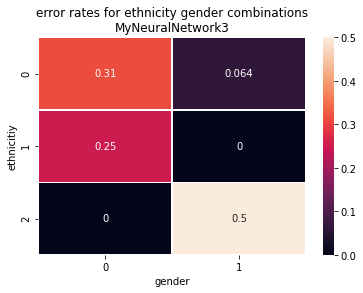

myModels/best/MyNeuralNetwork3_acc9200_epoch36.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch36.pt
in TestSet.len returning : 100


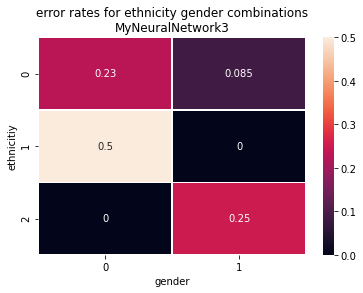

myModels/best/MyNeuralNetwork3_acc9100_epoch44.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9100_epoch44.pt
in TestSet.len returning : 100


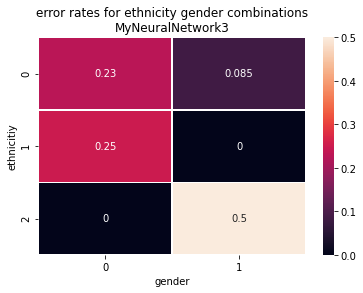

myModels/best/MyNeuralNetwork6_acc9600.pt myModels/best/MyNeuralNetwork6
MyNeuralNetwork6
will load state dict for  myModels/best/MyNeuralNetwork6_acc9600.pt
in TestSet.len returning : 100


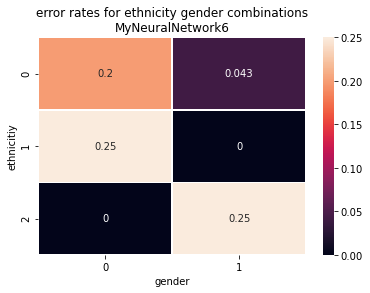

myModels/best/MyNeuralNetwork3_acc9400_epoch40.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9400_epoch40.pt
in TestSet.len returning : 100


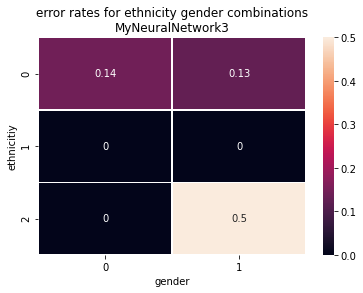

myModels/best/MyNeuralNetwork3_acc9300_epoch41.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9300_epoch41.pt
in TestSet.len returning : 100


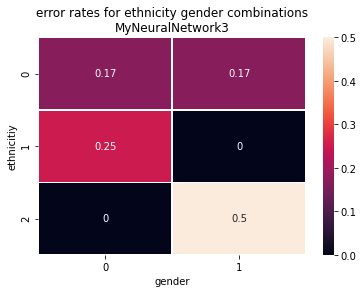

myModels/best/resnet18_pretrained.pt myModels/best/resnet18
resnet18
will load state dict for  myModels/best/resnet18_pretrained.pt
in TestSet.len returning : 100


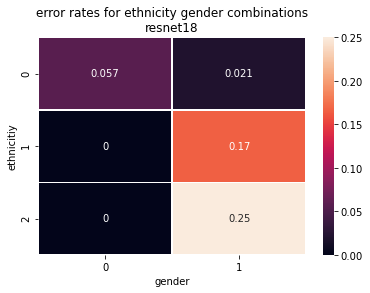

myModels/best/MyNeuralNetwork3_acc9200_epoch19.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200_epoch19.pt
in TestSet.len returning : 100


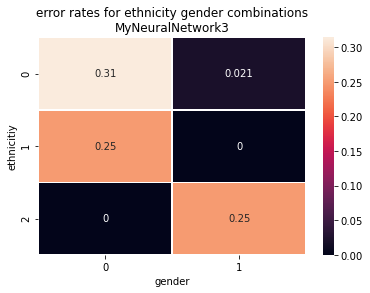

myModels/best/MyNeuralNetwork3_acc9000.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9000.pt
in TestSet.len returning : 100


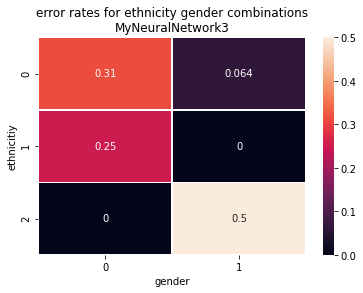

myModels/best/MyNeuralNetwork3_acc5699_epoch1.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc5699_epoch1.pt
in TestSet.len returning : 100


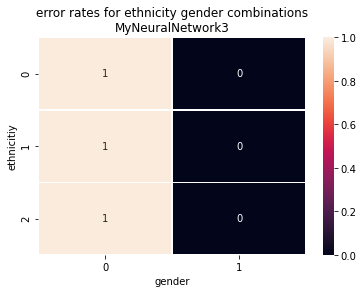

myModels/best/MyNeuralNetwork3_acc9400_epoch18.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9400_epoch18.pt
in TestSet.len returning : 100


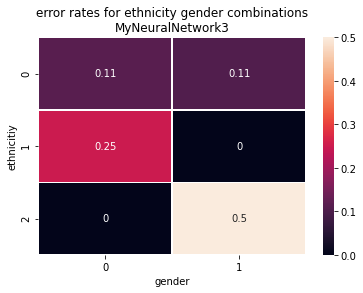

myModels/best/resnet18_pretrained_1epoch.pt myModels/best/resnet18
resnet18
will load state dict for  myModels/best/resnet18_pretrained_1epoch.pt
in TestSet.len returning : 100


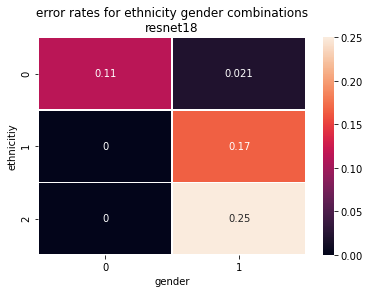

myModels/best/MyNeuralNetwork3_acc9100_epoch49.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9100_epoch49.pt
in TestSet.len returning : 100


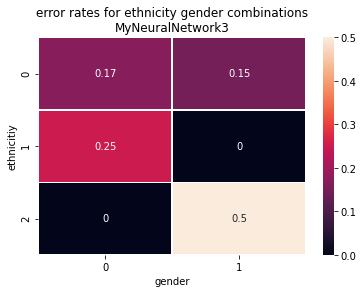

myModels/best/MyNeuralNetwork6_acc9400.pt myModels/best/MyNeuralNetwork6
MyNeuralNetwork6
will load state dict for  myModels/best/MyNeuralNetwork6_acc9400.pt
in TestSet.len returning : 100


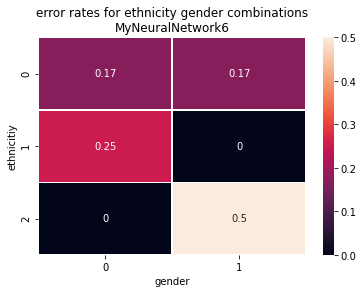

myModels/best/MyNeuralNetwork3_acc9100_epoch27.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9100_epoch27.pt
in TestSet.len returning : 100


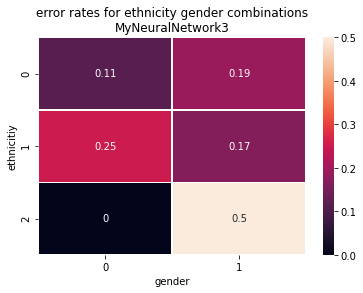

myModels/best/resnet18_pretrained_2epochs.pt myModels/best/resnet18
resnet18
will load state dict for  myModels/best/resnet18_pretrained_2epochs.pt
in TestSet.len returning : 100


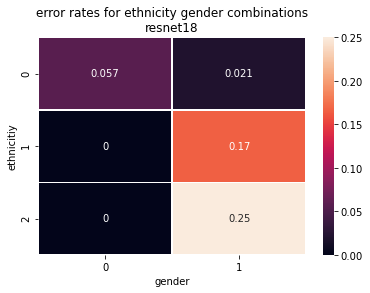

myModels/best/MyNeuralNetwork3_acc9100_epoch43.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9100_epoch43.pt
in TestSet.len returning : 100


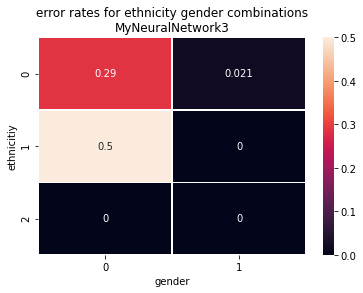

myModels/best/MyNeuralNetwork3_acc9300.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9300.pt
in TestSet.len returning : 100


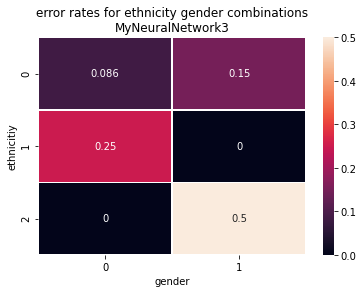

myModels/best/MyNeuralNetwork3_acc9300_epoch30.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9300_epoch30.pt
in TestSet.len returning : 100


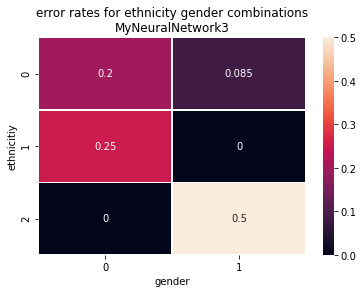

myModels/best/MyNeuralNetwork6_acc9200.pt myModels/best/MyNeuralNetwork6
MyNeuralNetwork6
will load state dict for  myModels/best/MyNeuralNetwork6_acc9200.pt
in TestSet.len returning : 100


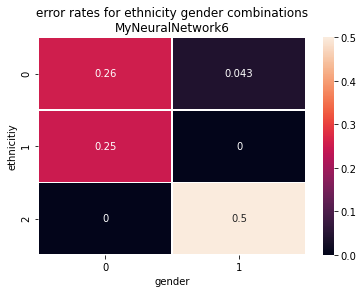

myModels/best/MyNeuralNetwork6_acc9300.pt myModels/best/MyNeuralNetwork6
MyNeuralNetwork6
will load state dict for  myModels/best/MyNeuralNetwork6_acc9300.pt
in TestSet.len returning : 100


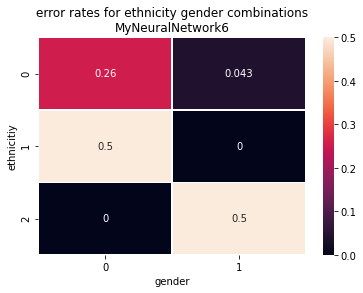

myModels/best/MyNeuralNetwork3_acc_9300.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc_9300.pt
in TestSet.len returning : 100


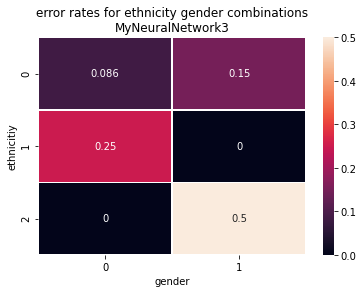

myModels/best/MyNeuralNetwork3_acc9200.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc9200.pt
in TestSet.len returning : 100


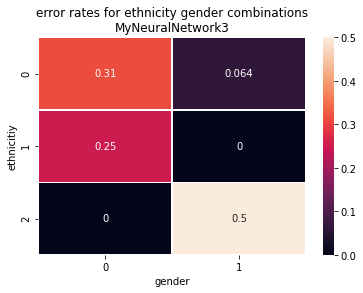

myModels/best/MyNeuralNetwork3_acc8400.pt myModels/best/MyNeuralNetwork3
MyNeuralNetwork3
will load state dict for  myModels/best/MyNeuralNetwork3_acc8400.pt
in TestSet.len returning : 100


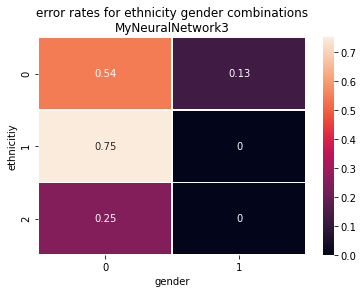

In [19]:
import glob
from torchvision import models

# model dictionary preparation

# for resnet model , fit it again
# should have implemented a mm class for the fitted model ...

resnet18transfer = models.resnet18(pretrained=True)
# adapt model as in training , repeat the transfer part
num_ftrs = resnet18transfer.fc.in_features
resnet18transfer.fc = nn.Linear(num_ftrs, 2)
# now model fits the model we saved the parameters for

# model dictionary
md ={'MyNeuralNetwork1': mm.MyNeuralNetwork1() , \
     'MyNeuralNetwork3': mm.MyNeuralNetwork3() , \
     'MyNeuralNetwork6': mm.MyNeuralNetwork6() , \
     'resnet18': resnet18transfer}

dict1 ={}

for fn in glob.glob(model_dir+'*.pt*'):
    mn , _ = fn.split('_',1) # first part of the filename is the model name
    print(fn, mn)
    a,b = mn.split(model_dir)
    print(b)
    model=md[b]
    print('will load state dict for ' , fn)
    model.load_state_dict(torch.load(fn))
    model.eval() # we want to do predictions, not training
    model.to(device)
    # the test set has to be loaded with a shape of imgH, imgW differently for the networks 3 and 6.
    # HOW EXACTLY TO DO THIS IN THE LOOP
    test_loader = get_data_loader(dataset_path=images_test_dir , labels_path=test_labels_file, model=model)

    err, tot = test.run_test_short(test_loader, model, device)
    err_rel = matrix_division(err,tot)
    #print(err_rel)
    sns.heatmap(err_rel, linewidth=0.5, annot=True)
    plt.title('error rates for ethnicity gender combinations\n'+b)
    plt.xlabel('gender')
    plt.ylabel('ethnicitiy')
    plt.savefig(test_plots_dir+b+'_error.png')
    plt.show()
    # put these numbers in a dictionary
    acc = (tot.sum() - err.sum()) / tot.sum()
    dict1.update({fn:[acc, round(max(np.ravel(err_rel[0:2,:])),2) , *np.ravel(err_rel[0:2,:]) ]})
    #print('accuracy : ' , acc )
    #print('highest error rate in ethnicities 1,2 :' , max(np.ravel(err_rel[0:2,:])))
    #print('************************')
df=pd.DataFrame.from_dict(dict1, orient='index', columns=['acc','max error (e,g)','error (e,g)=(1,0)','error (e,g)=(1,1)','error (e,g)=(2,0)','error (e,g)=(2,1)']).sort_index()

In [20]:
df

,acc,"max error (e,g)","error (e,g)=(1,0)","error (e,g)=(1,1)","error (e,g)=(2,0)","error (e,g)=(2,1)"
myModels/best/MyNeuralNetwork3_acc5699_epoch1.pt,0.57,1.00,1.000000,0.000000,1.00,0.000000
myModels/best/MyNeuralNetwork3_acc8400.pt,0.71,0.75,0.542857,0.127660,0.75,0.000000
myModels/best/MyNeuralNetwork3_acc8800.pt,0.83,0.50,0.314286,0.042553,0.50,0.000000
myModels/best/MyNeuralNetwork3_acc9000.pt,0.83,0.31,0.314286,0.063830,0.25,0.000000
myModels/best/MyNeuralNetwork3_acc9100_epoch27.pt,0.83,0.25,0.114286,0.191489,0.25,0.166667
myModels/best/MyNeuralNetwork3_acc9100_epoch33.pt,0.84,0.25,0.142857,0.148936,0.25,0.000000
myModels/best/MyNeuralNetwork3_acc9100_epoch43.pt,0.87,0.50,0.285714,0.021277,0.50,0.000000
myModels/best/MyNeuralNetwork3_acc9100_epoch44.pt,0.85,0.25,0.228571,0.085106,0.25,0.000000
myModels/best/MyNeuralNetwork3_acc9100_epoch49.pt,0.84,0.25,0.171429,0.148936,0.25,0.000000
myModels/best/MyNeuralNetwork3_acc9200.pt,0.83,0.31,0.314286,0.063830,0.25,0.000000


In [ ]:
# not working, maybe it works on chrome 
# cf https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png
'''!pip install dataframe_image
import dataframe_image as dfi
dfi.export(df,'errors.png')'''
df